In [28]:
#import everything
import csv
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#open csv file
laptop = 'C:/Users/ablacklama/Desktop/data/driving_log.csv'
desktop = 'C:/Users/Spencer/Desktop/Data/driving_log.csv'
lines = []
percent_keep = 0.5

with open(laptop) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        if (len(line) == 7):
            lines.append(line)

#split train/val data
train_samples, validation_samples = train_test_split(lines, test_size=0.2)

In [30]:
#returns tuple of (images, angles) and includes side images with angles modified by "offset" 
def load_images_and_angles(rows, offset=0.25):
    images = []
    angles = []
    
    for row in rows:
        image_center_path = row[0]
        image_left_path = row[1]
        image_right_path = row[2]
        
        image_center = cv2.imread(image_center_path)
        image_left = cv2.imread(image_left_path)
        image_right = cv2.imread(image_right_path)
        
        angle_center = float(row[3])
        angle_left = angle_center + offset
        angle_right = angle_center - offset
        
        images.append(image_center)
        angles.append(angle_center)
        images.append(image_left)
        angles.append(angle_left)
        images.append(image_right)
        angles.append(angle_right)
        
    images = np.array(images)
    angles = np.array(angles)
    return(images, angles)

In [31]:
def horizontal_flip(images, angles, gen_new=False):
    assert len(images) == len(angles)
    images_new = []
    angles_new = []
    change = np.ones(len(angles))
    if not (gen_new):
        change = np.random.random(len(images))
    
    
    for i,rand in zip(range(len(images)), change):
        image_new = images[i]
        angle_new = angles[i]
        
        if(rand > 0.5):
            image_new = np.fliplr(image_new)
            angle_new = angles[i] * -1.0
        images_new.append(image_new)
        angles_new.append(angle_new)
        
    if(gen_new):
        images_new.extend(images)
        angles_new.extend(angles)
        
    images_new = np.array(images_new)
    angles_new = np.array(angles_new)
    
    return(images_new, angles_new)

In [32]:
#change the brightness of images and return the images and angles.
#:gen_new: determains whether you want to change some of the current images, or double each image and change a copy
# ratio: what portion of the data would you like changed. (Note: doesn't work with gen_new)
def mix_brightness(images, angles, gen_new=False, ratio=0.5):
    assert len(images) == len(angles)
    assert ratio >= 0
    
    images_new = []
    angles_new = []
    change = np.zeros(len(angles))
    if not (gen_new):
        change = np.random.random(len(images))
        
    for i,rand in zip(range(len(images)), change):
        image_new = images[i]
        angle_new = angles[i]
        
        if(rand <= ratio):
            image_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2HSV)
            random_bright = 0
            while (random_bright < .25):
                random_bright = np.random.random()
            image_new[:,:,2] = image_new[:,:,2] * random_bright
            image_new = cv2.cvtColor(image_new, cv2.COLOR_HSV2BGR)
            
        images_new.append(image_new)
        angles_new.append(angle_new)
        
    if(gen_new):
        images_new.extend(images)
        angles_new.extend(angles)
        
    images_new = np.array(images_new)
    angles_new = np.array(angles_new)
    
    return(images_new, angles_new)

In [33]:
#change the Color of images and returns the images and angles
#:gen_new: determains whether you want to change some of the current images, or double each image and change a copy
# ratio: what portion of the data would you like changed. (Note: doesn't work with gen_new)
def shift_colors(images, angles, gen_new=False, ratio=0.5):
    assert len(images) == len(angles)
    assert ratio >= 0
    
    images_new = []
    angles_new = []
    change = np.zeros(len(angles))
    if not (gen_new):
        change = np.random.random(len(images))
        
    for i,rand in zip(range(len(images)), change):
        image_new = images[i]
        angle_new = angles[i]
        
        if(rand <= ratio):
            image_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2HSV)
            random_hue = np.random.randint(256) - 128
            random_saturation = np.random.randint(20) -10
            image_new[:,:,0] = image_new[:,:,0] + random_hue
            image_new[:,:,1] = image_new[:,:,1] + random_saturation
            image_new = cv2.cvtColor(image_new, cv2.COLOR_HSV2BGR)
            
        images_new.append(image_new)
        angles_new.append(angle_new)
        
    if(gen_new):
        images_new.extend(images)
        angles_new.extend(angles)
        
    images_new = np.array(images_new)
    angles_new = np.array(angles_new)
    
    return(images_new, angles_new)

In [34]:
#removes a keep_prob ratio of images with an abs steer angle of less than keep_angle and returns the images and angles
def remove_straight_angles(images, angles, keep_prob=0.5, keep_angle=0.15):
    assert len(images) == len(angles)
    
    
    images_new = []
    angles_new = []
    
    rand_list = np.random.random(len(images))
        
    for i,rand in zip(range(len(images)), rand_list):
        image_new = images[i]
        angle_new = angles[i]
        
        if(abs(angle_new) < keep_angle):
            if(rand < keep_prob):
                images_new.append(image_new)
                angles_new.append(angle_new)
        
        else:
            images_new.append(image_new)
            angles_new.append(angle_new)
        
    
        
    images_new = np.array(images_new)
    angles_new = np.array(angles_new)
    
    return(images_new, angles_new)

In [35]:
#shifts images on x and y axis and returns the images and angles
#:gen_new: determains whether you want to change some of the current images, or double each image and change a copy
# ratio: what portion of the data would you like changed. (Note: doesn't work with gen_new)
def translate_images(images, angles, gen_new=False, ratio=0.25):
    assert len(images) == len(angles)
    assert ratio >= 0
    
    images_new = []
    angles_new = []
    change = np.zeros(len(angles))
    if not (gen_new):
        change = np.random.random(len(images))
        
    for i,rand in zip(range(len(images)), change):
        image_new = images[i]
        angle_new = angles[i]
        
        if(rand <= ratio):
            shift_x = np.random.randint(200) - 100
            shift_y = np.random.randint(80) -40
            M = np.float32([[1,0,shift_x],[0,1,shift_y]])
            image_new = cv2.warpAffine(image_new,M, (320,160))
            angle_new = angle_new + (float(shift_x) * 0.004)
            
        images_new.append(image_new)
        angles_new.append(angle_new)
        
    if(gen_new):
        images_new.extend(images)
        angles_new.extend(angles)
        
    images_new = np.array(images_new)
    angles_new = np.array(angles_new)
    
    return(images_new, angles_new)

-0.25107722


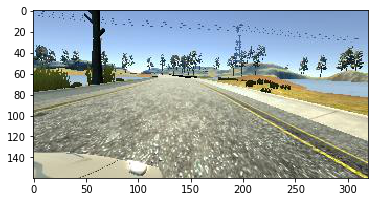

In [56]:
images, angles = load_images_and_angles(train_samples[:1], offset=0.2)
images, angles = add_shadows(images, angles)
image_new = images[2]
print(angles[2])
plt.imshow(cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB))

[1 0]
False
(160, 320, 3)


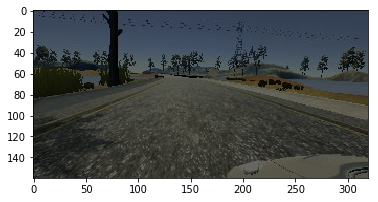

In [57]:
arr = np.random.randint(3, size = 2)
print(arr)
print((arr > 0).all())
images, angles = load_images_and_angles(train_samples[0:2], offset=0.2)
print(images[1].shape)
images, angles = horizontal_flip(images, angles, gen_new=False)
images, angles = mix_brightness(images, angles, gen_new=False, ratio=0.5)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))

In [74]:
def generator(samples, batch_size=64):
    num_samples = len(samples)
    group_size = batch_size * 5
    while 1:
        shuffle(samples)
        #for each group to be processed together
        for group_offset in range(0, num_samples, group_size):
            group_samples = samples[group_offset:group_offset+group_size]
            #load images and angles
            group_images, group_angles = load_images_and_angles(group_samples, offset=0.25)
            
            #trim the number of images with straight angles
            group_images, group_angles = remove_straight_angles(group_images, group_angles, keep_prob=0.5, keep_angle=.25)
            
            #horazontally flip some of the images
            group_images, group_angles = horizontal_flip(group_images, group_angles, gen_new=True)
            
            #randomize some of the images brightness
            group_images, group_angles = mix_brightness(group_images, group_angles, gen_new=False, ratio=0.5)
            
            #randomize hue with slight modifications to saturation
            group_images, group_angles = shift_colors(group_images, group_angles, gen_new=False, ratio=0.5)
            
              
            for batch_offset in range(0, len(group_images), batch_size):
                x_batch = group_images[batch_offset:batch_offset+batch_size]
                y_batch = group_angles[batch_offset:batch_offset+batch_size]
                
                yield shuffle(x_batch, y_batch)

In [75]:
def val_generator(samples, batch_size=64):
    num_samples = len(samples)
    while 1:
        shuffle(samples)
        for batch_offset in range(0, len(samples), batch_size):
            batch_samples = samples[batch_offset:batch_offset+batch_size]    
            batch_images, batch_angles = load_images_and_angles(batch_samples, offset=0.25)
            x_batch = batch_images
            y_batch = batch_angles
                
            yield shuffle(x_batch, y_batch)

In [76]:
train_generator = generator(train_samples)
validation_generator = val_generator(validation_samples)

In [77]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Conv2D, MaxPooling2D, Cropping2D, Dropout
from keras.optimizers import Adam

model = Sequential()

model.add(Lambda(lambda x: x / 255.0 - .5, input_shape=(160,320,3)))

model.add(Cropping2D(cropping=((50,20),(0,0))))
model.add(Conv2D(24, 5, 3, subsample=(2,2), activation='relu', border_mode='same'))
model.add(Conv2D(36, 5, 3, subsample=(2,2), activation='relu', border_mode='same'))
model.add(Conv2D(48, 5, 3, subsample=(2,2), activation='relu', border_mode='same'))
model.add(Dropout(.5))
model.add(Conv2D(64, 3, 1, subsample=(2,2), activation='relu', border_mode='same'))
model.add(Dropout(.5))
model.add(Conv2D(64, 3, 1, subsample=(2,2), activation='relu', border_mode='same'))
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

model.fit_generator(train_generator, samples_per_epoch=len(train_samples) * 6, validation_data=validation_generator, nb_val_samples=len(validation_samples) * 6, nb_epoch=6)

model.save('model.h5')

Epoch 1/6
83452/83496 [============================>.] - ETA: 0s - loss: 0.0730

C:\Users\ablacklama\Miniconda3\envs\carnd-term1\lib\site-packages\keras\engine\training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


83516/83496 [==============================] - 531s - loss: 0.0730 - val_loss: 0.0282
Epoch 2/6
83558/83496 [==============================] - 525s - loss: 0.0361 - val_loss: 0.0183
Epoch 3/6
83526/83496 [==============================] - 514s - loss: 0.0295 - val_loss: 0.0168
Epoch 4/6
83534/83496 [==============================] - 508s - loss: 0.0258 - val_loss: 0.0159
Epoch 5/6
83514/83496 [==============================] - 511s - loss: 0.0248 - val_loss: 0.0155
Epoch 6/6
83514/83496 [==============================] - 492s - loss: 0.0239 - val_loss: 0.0160
